In [1]:
# Load environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

In [2]:
# load dataset
df = pd.read_csv('../data/age_gender.csv')

## Model of gender Detection
Current Accuracy - 85%

In [3]:
# Read dataset
df = pd.read_csv('age_gender.csv')

# Drop unneeded columns
df.drop(['ethnicity', 'img_name', 'age'], axis = 1, inplace=True)

# Convert the pixels string to numbers
df = pd.concat([df.gender, df['pixels'].apply(lambda x: pd.Series([int(i) for i in x.split()]))], axis=1) 


In [4]:
# Seperate variables age and images
images = df.drop(df.columns[0], axis=1)
gender = df.gender

In [5]:
# Label the gender and one hot encoding
gender = pd.get_dummies(gender)

gender.shape

(23705, 2)

In [6]:
# Normalize the pixels
images = images / 255 #0~255     0~1

In [7]:
# Reshape the image so tensorflow can read
images = images.values.reshape(-1, 48, 48, 1) # 2304 = 48 * 48
print(images.shape)

(23705, 48, 48, 1)


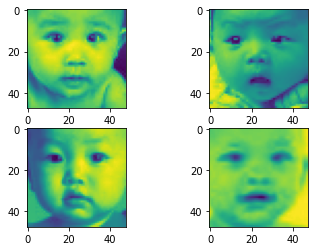

In [8]:
# Print the reshaping result
plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i][:, :, 0])
plt.show()

In [9]:
# Seperate the train and test sets
train_images, test_images, train_gender, test_gender = train_test_split(images, gender, 
                                                                     random_state = 32, test_size = 0.2) # 20% 80%


In [10]:
# Build the model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu', input_shape = (48, 48, 1)))   
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))

In [11]:
# check the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        2

In [12]:
# Set optimizer and compile model
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer = optimizer,loss = ['mse'], metrics = ['accuracy'])

In [13]:
# Set training parameters
epochs =  3
batch_size = 64

In [14]:
# Train the model
history = model.fit(train_images, train_gender,
                   batch_size = batch_size, epochs = epochs,
                   validation_data = (test_images, test_gender))

Epoch 1/5
297/297 [==============================] - 148s 482ms/step - loss: 0.2046 - accuracy: 0.6748 - val_loss: 0.1545 - val_accuracy: 0.7823
Epoch 2/5
297/297 [==============================] - 151s 509ms/step - loss: 0.1431 - accuracy: 0.7963 - val_loss: 0.1157 - val_accuracy: 0.8361
Epoch 3/5
297/297 [==============================] - 151s 510ms/step - loss: 0.1242 - accuracy: 0.8231 - val_loss: 0.1032 - val_accuracy: 0.8532
Epoch 4/5
297/297 [==============================] - 121s 406ms/step - loss: 0.1144 - accuracy: 0.8375 - val_loss: 0.1024 - val_accuracy: 0.8528
Epoch 5/5
297/297 [==============================] - 144s 486ms/step - loss: 0.1101 - accuracy: 0.8468 - val_loss: 0.0933 - val_accuracy: 0.8677


Text(0, 0.5, 'accuracy')

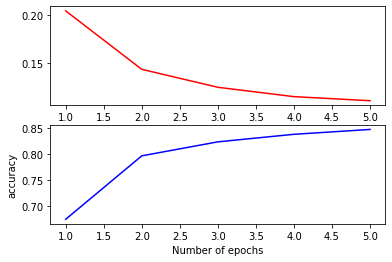

In [15]:
# visualize the accuracy
fig,ax = plt.subplots(2, 1)
fig.set
x = range(1,1 + epochs)
ax[0].plot(x,history.history['loss'],color = 'red')

ax[1].plot(x,history.history['accuracy'],color = 'blue')

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')

In [16]:
# save the model to filesystem
model.save("./gender.keras_model")

INFO:tensorflow:Assets written to: ./gender.keras_model\assets
